# ThreeFold Grid Simulator
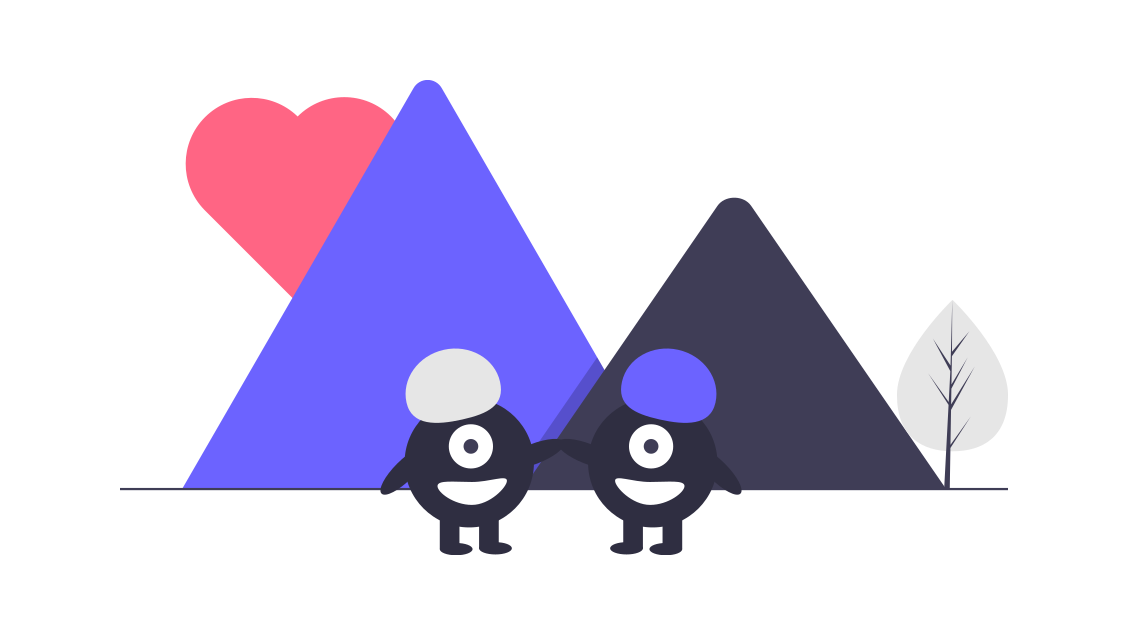

### Growth Parameters!

- Price = TFT Token price in 5 years from now.
- When the price is put on auto, it will calculate the grid value (see params_valuation) automatically.


In [1]:
from lib import *
import ipywidgets as w

config = j.tools.tfgrid_simulator.simulator_config

if config.tft_pricing_type == "auto":
    autodefault = "yes"
else:
    autodefault = "no"

def simulate(auto=autodefault,price=config.tft_price_5y, growth=config.node_growth):
    if auto=="yes":
        config.tft_pricing_type="auto"        
    else:
        config.tft_pricing_type="fixed"
        
    config.tft_price_5y=price
    config.node_growth=growth
    config.save()
    
w.interact(simulate, auto=["yes","no"], price = (0.0, 10.0, 0.15), growth=[50000, 100000, 200000, 600000, 1000000, 2000000]);

interactive(children=(Dropdown(description='auto', index=1, options=('yes', 'no'), value='no'), FloatSlider(va…

### Pricing For Cloud Capacity

See cloudorado for market price comparison [storage](https://www.cloudorado.com/cloud_storage_comparison.jsp) and [compute](https://www.cloudorado.com/cloud_server_comparison.jsp)

- For SU = 1 TB of storage per month
    - most cloud vendors use USD20-190 per month
- For CU = 4GB Memory and 2 virtual CPU
    - most cloud vendors use USD40-200 per month


In [2]:

def cloudpricing(price_cu=config.pricing.price_cu, 
                 price_su=config.pricing.price_su,price_nu=config.pricing.price_nu):
    config.pricing.price_cu = price_cu
    config.pricing.price_su = price_su
    config.pricing.price_nu = price_nu
    config.save()
    
w.interact(cloudpricing, price_cu = (5, 100, 1), price_su = (2, 100, 1), price_nu = (0.00,0.5, 0.01));




interactive(children=(IntSlider(value=15, description='price_cu', min=5), IntSlider(value=10, description='pri…

### Farming Hardware Parameters

the start month, is the batch we will simulate    (*normally 1 is the right starth month*)

In [3]:

def startmonth_get(startmonth=config.startmonth):    
    config.startmonth = startmonth
    config.save()

w.interact(startmonth_get, startmonth=(0,30,1));

interactive(children=(IntSlider(value=1, description='startmonth', max=30), Output()), _dom_classes=('widget-i…

In [4]:
hwchoices=j.tools.tfgrid_simulator.hardware_platform_choices()

def hwchoice_get(hwchoice=config.hardwareconfig):    
    config.hardwareconfig = hwchoice
    config.save()

w.interact(hwchoice_get, hwchoice=hwchoices);


interactive(children=(Dropdown(description='hwchoice', index=1, options=('hpe_dl385_amd', 'A_dc_rack', 'hpe_ap…

In [ ]:
# Tokenomics Parameters


In [10]:

# def tokenomics(cpr_usd=config.tokenomics.cpr_investment_usd, 
#                  burn_percent=config.tokenomics.burn_percent):
#     config.tokenomics.cpr_investment_usd = cpr_usd
#     config.tokenomics.burn_percent = burn_percent
#     config.save()
    
# w.interact(tokenomics, cpr_usd = (20, 50, 1), burn_percent = (0, 50, 1));



interactive(children=(IntSlider(value=40, description='cpr_usd', max=50, min=20), IntSlider(value=40, descript…

### Other parameters

- To generic simulation params [default.py](/edit/simulations/default.py)
- To edit token creation open [token_creators](/tree/token_creators)


In [ ]:
#j.tools.tfgrid_simulator.simulator_config.load()